# 1.Pyber

The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.

You've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

Your objective is to build a Bubble Plot that showcases the relationship between four key variables:
- Average Fare ($) Per City
- Total Number of Rides Per City
- Total Number of Drivers Per City
- City Type (Urban, Suburban, Rural)

In addition, you will be expected to produce the following three pie charts:
- % of Total Fares by City Type
- % of Total Rides by City Type
- % of Total Drivers by City Type

As final considerations:

- You must use the Pandas Library and the Jupyter Notebook.
- You must use the Matplotlib library.
- You must include a written description of three observable trends based on the data.
- You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge 
Percentages, and Wedge Labels.

Remember when making your plots to consider aesthetics!

- You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
- When making your Bubble Plot, experiment with effects like alpha, edgecolor, and linewidths.
- When making your Pie Chart, experiment with effects like shadow, startangle, and explosion.

See Starter Workbook for a reference on expected format.

In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# File to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Drop duplicates of city names
city_df = city_df.drop_duplicates("city", keep = "first")
ride_df2 = ride_df.drop_duplicates("city", keep = "first")

# Combine the data into a single dataset
merged_df = ride_df2.merge(city_df, on="city")

# Display the data table for preview
merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

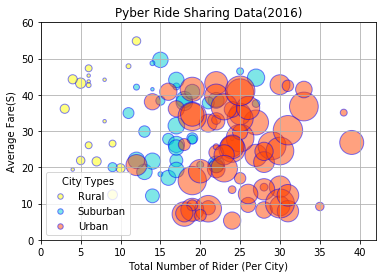

In [12]:
#creating DataFrame:

avg_fare = merged_df.groupby(["city"])["fare"].mean()
total_rides = ride_df.groupby(["city"]).count()["ride_id"]
total_drivers = merged_df.groupby(["city"])["driver_count"].sum()
city_types = city_df.set_index(["city"])["type"]

new_df = pd.DataFrame ({"Count of Rides": total_rides, "Average Fare": avg_fare, 
                        "Count of Drivers": total_drivers, "City Types": city_types
                       })

# sorting the data frame:

new_df.sort_values("Count of Drivers", ascending = False)

#deviding the data frame base on city types:

r_df = new_df[new_df["City Types"] == "Rural"]
s_df = new_df[new_df["City Types"] == "Suburban"]
u_df = new_df[new_df["City Types"] == "Urban"]

# Obtain the x and y coordinates for each of the three city types

plt.scatter(r_df["Count of Rides"], r_df["Average Fare"], s = r_df["Count of Drivers"]*12, color="yellow", edgecolor="blue", label="Rural", alpha=0.5)

plt.scatter(s_df["Count of Rides"], s_df["Average Fare"], s = s_df["Count of Drivers"]*12, color="darkturquoise", edgecolor="blue", label="Suburban", alpha=0.5)

plt.scatter(u_df["Count of Rides"], u_df["Average Fare"], s = u_df["Count of Drivers"]*12, color="orangered", edgecolor="blue", label="Urban", alpha=0.5)

# Incorporate the other graph properties

plt.grid()
plt.xlim(0, 42)
plt.ylim(0, 60)

# Create a legend 

lgnd = plt.legend(title="City Types", loc="best")

# To equal the size of legend points:

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size

plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rider (Per City)")
plt.ylabel("Average Fare(S)")

# Save Figure
plt.savefig("../Images/Ride.png")

In [5]:
# Show plot
plt.show()

## Total Fares by City Type

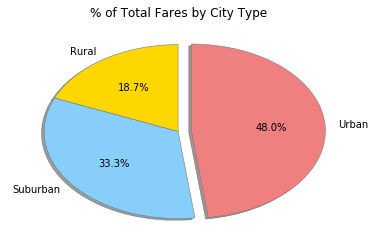

In [6]:
# Calculate Type Percents

type_group = merged_df.groupby('type')["type", "fare", "ride_id", "driver_count"]
total_fare = type_group.sum()['fare']

# Build Pie Chart

colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0 , 0, 0.1]

plt.pie(total_fare, startangle = 90, colors = colors, explode = explode, labels = total_fare.index, autopct = "%1.1f%%",
        shadow = True, wedgeprops = {"linewidth": 0.6, "edgecolor": "grey"})

plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig("../Images/Ride2.png")

In [7]:
# Show Figure
plt.show()

## Total Rides by City Type

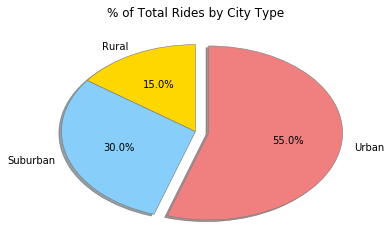

In [8]:
# Calculate Ride Percents

total_ride = type_group.count()["ride_id"]
total_ride

# Build Pie Chart

colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0 , 0, 0.1]

plt.pie(total_ride, startangle = 90, colors = colors, explode = explode, labels = total_ride.index, autopct = "%1.1f%%",
        shadow = True, wedgeprops = {"linewidth": 0.6, "edgecolor": "grey"})

plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig("../Images/Ride3.png")

In [9]:
# Show Figure
plt.show()

## Total Drivers by City Type

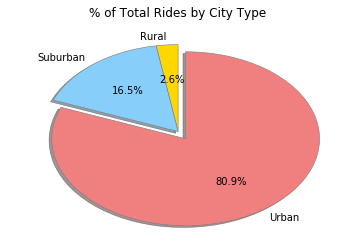

In [10]:
# Calculate Driver Percents

total_drivers = type_group.sum()["driver_count"]
total_drivers

# Build Pie Chart

colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0 , 0, 0.1]

plt.pie(total_drivers, startangle = 90, colors = colors, explode = explode, labels = total_drivers.index, autopct = "%1.1f%%",
        shadow = True, wedgeprops = {"linewidth": 0.6, "edgecolor": "grey"})

plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig("../Images/Ride4.png")

In [11]:
# Show Figure
plt.show()